In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('train2_1209', 'rb') as f:
    train = pickle.load(f)

In [3]:
data = train[train['meter']==0]

In [4]:
data = data.drop('timestamp',axis=1)

In [5]:
display(data)

,building_id,meter,meter_reading,site_id,primary_use,square_feet,floor_count,age,weekday,hour,...,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,humidity,apparent_temp,min_temperature,max_temperature,mean_temperature
103,105,0,23.303600,1,0,50623,5,10,4,0,...,2.4,0.0,1020.900024,5,3.1,90.559998,0.2786,2.0,8.5,5.3875
104,106,0,0.374600,1,0,5374,4,10,4,0,...,2.4,0.0,1020.900024,5,3.1,90.559998,0.2786,2.0,8.5,5.3875
106,107,0,175.184006,1,0,97532,10,2,4,0,...,2.4,0.0,1020.900024,5,3.1,90.559998,0.2786,2.0,8.5,5.3875
107,108,0,91.265297,1,0,81580,5,20,4,0,...,2.4,0.0,1020.900024,5,3.1,90.559998,0.2786,2.0,8.5,5.3875
108,109,0,80.930000,1,0,56995,6,12,4,0,...,2.4,0.0,1020.900024,5,3.1,90.559998,0.2786,2.0,8.5,5.3875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,1444,0,8.750000,15,2,19619,2,20,5,23,...,-5.6,0.0,1008.500000,4,8.8,58.299999,-4.2340,-4.4,3.0,-1.6500
20216096,1445,0,4.825000,15,0,4298,0,10,5,23,...,-5.6,0.0,1008.500000,4,8.8,58.299999,-4.2340,-4.4,3.0,-1.6500
20216097,1446,0,0.000000,15,2,11265,1,4,5,23,...,-5.6,0.0,1008.500000,4,8.8,58.299999,-4.2340,-4.4,3.0,-1.6500
20216098,1447,0,159.574997,15,1,29775,2,3,5,23,...,-5.6,0.0,1008.500000,4,8.8,58.299999,-4.2340,-4.4,3.0,-1.6500


In [6]:
X = data.drop(['meter_reading'],axis=1)  #independent columns
y = data['meter_reading']    #target column i.e price range#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


ValueError: Input X must be non-negative.

In [8]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/home/cyrus/.local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Unknown label type: 'continuous'

In [12]:
X.dtypes

building_id            uint16
meter                   uint8
site_id                 uint8
primary_use             uint8
square_feet            uint32
floor_count             uint8
age                     uint8
weekday                 uint8
hour                    uint8
month                   uint8
air_temperature       float32
cloud_coverage         uint16
dew_temperature       float32
precip_depth_1_hr     float32
sea_level_pressure    float32
wind_direction          uint8
wind_speed            float32
humidity              float32
apparent_temp         float32
min_temperature       float32
max_temperature       float32
mean_temperature      float32
dtype: object

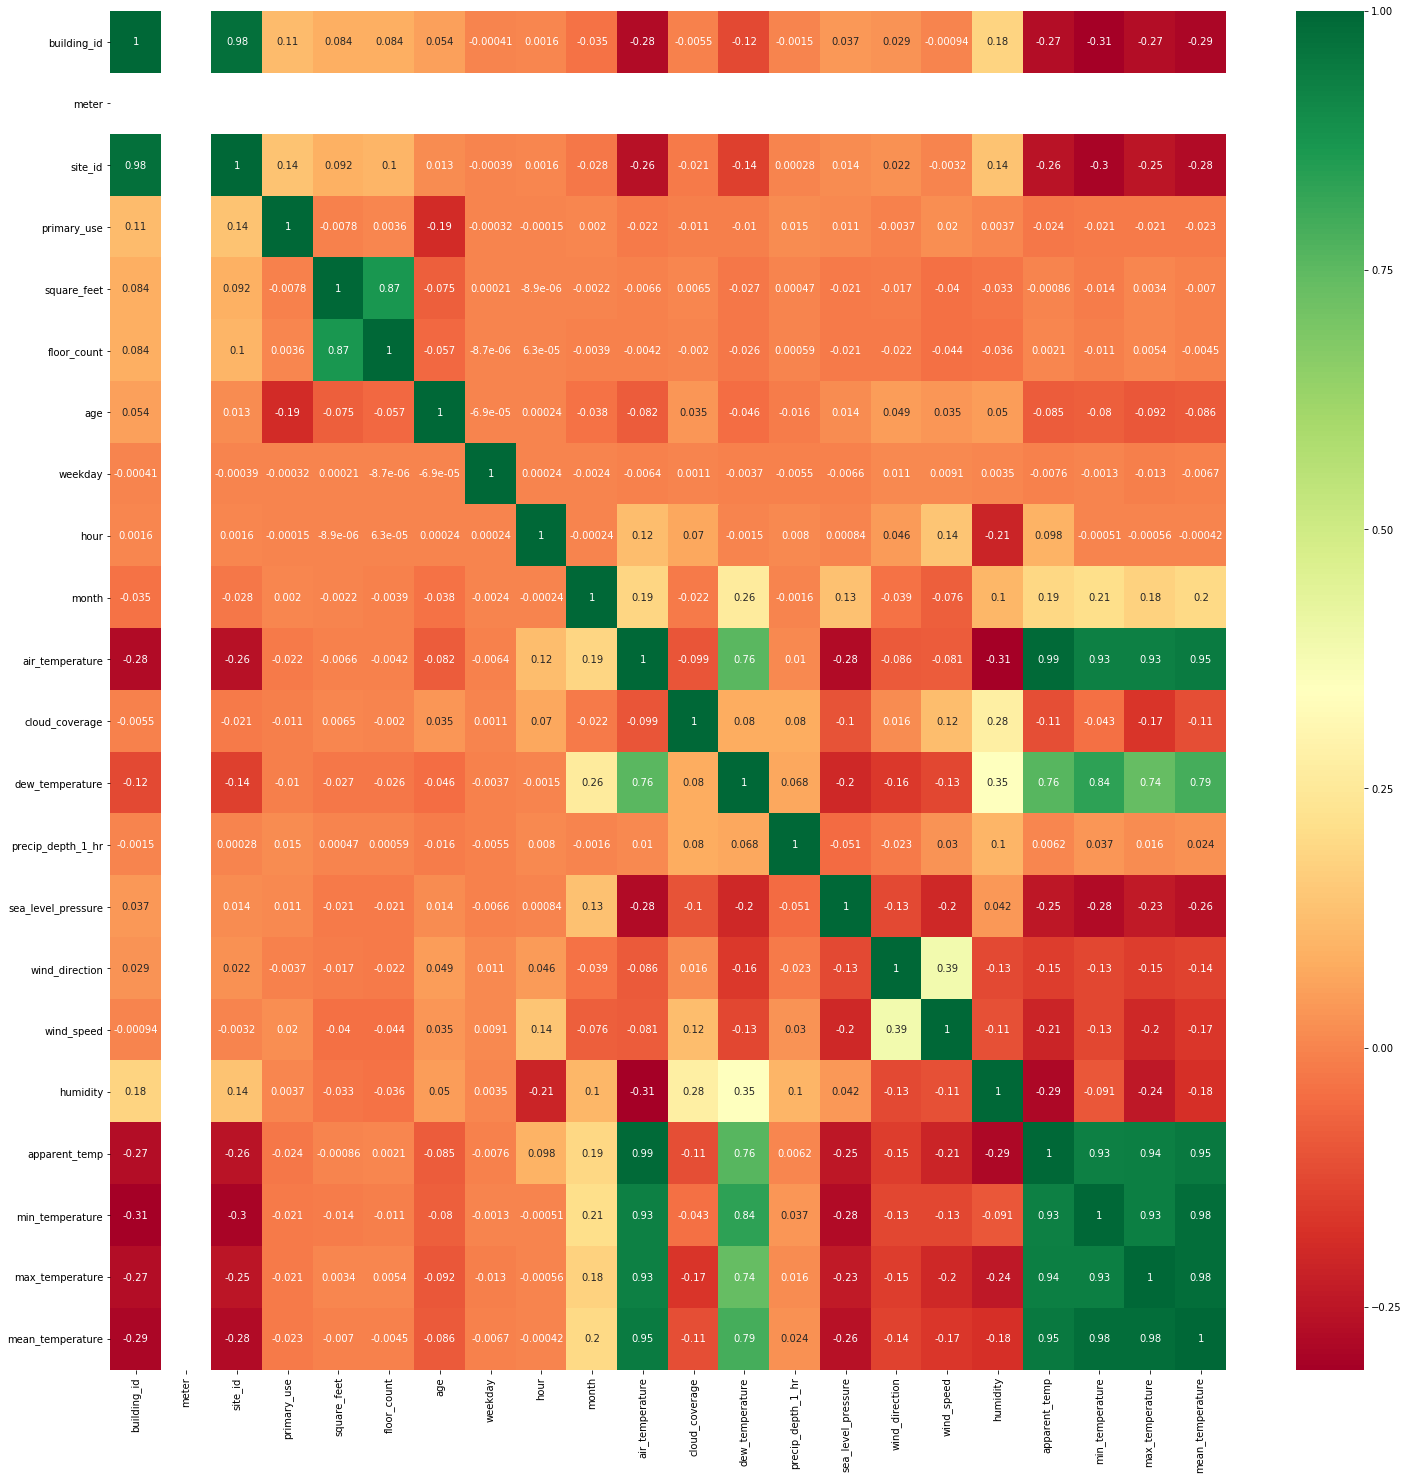

In [15]:
#get correlations of each features in dataset
corrmat = X.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")